# <u>TP2 : Linear regression </u>

*by Clément Dardare*

In [3]:
fn1 = "clement"
ln1 = "dardare"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## <u>Question 1)</u>
Preprocess the data


In [5]:
#a)

np.random.seed(0)


#b)

#Load the data
path= './meatspec.csv'
meatspec = pd.read_csv(path, sep = ',')
meatspec.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [6]:
#Separate input and output
X = meatspec.copy()
X = X.iloc[:,:-1]
Y = meatspec['fat']

#print the mean and the standard deviation
X.describe()[1:3]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
mean,2.808561,2.811137,2.813727,2.816363,2.819098,2.821983,2.825064,2.828375,2.831943,2.835813,...,3.198627,3.178262,3.158254,3.138534,3.119104,3.099971,3.08107,3.062290,3.043548,3.024895
std,0.410793,0.413352,0.415906,0.418465,0.421040,0.423635,0.426245,0.428866,0.431510,0.434195,...,0.542146,0.541957,0.541776,0.541519,0.541135,0.540563,0.53973,0.538586,0.537108,0.535354


We verify de the data by plottin the mean and the standard deviation

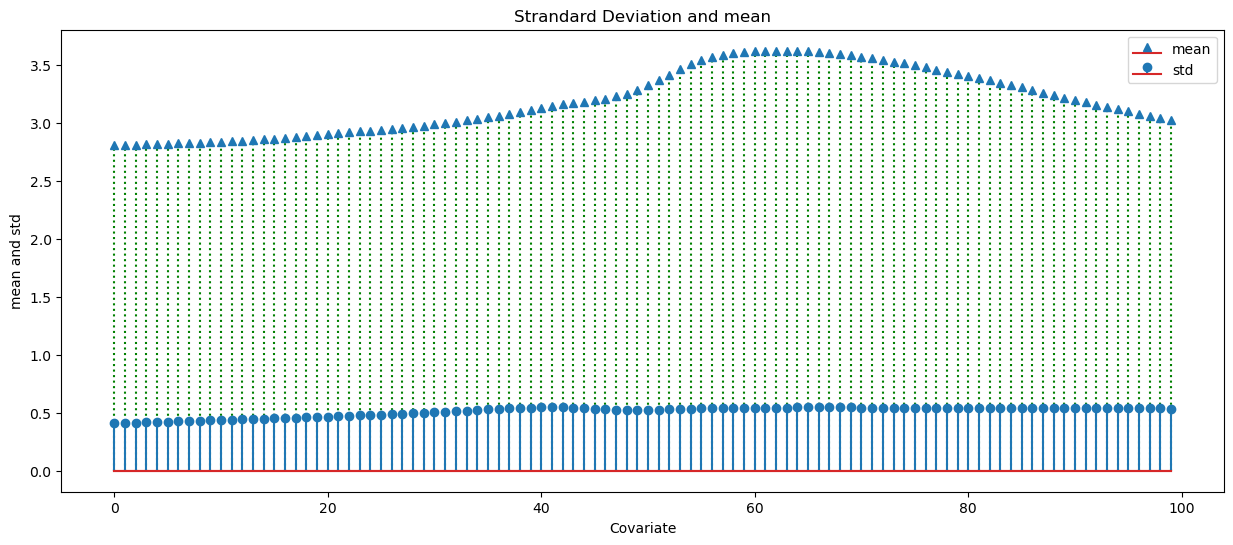

In [7]:
#Dimensions of X
n, p = X.shape

#Plot Mean and standart deviation 
plt.figure(figsize=(15,6))
plt.stem(range(p), X.mean(), label="mean", markerfmt='^', linefmt='g:')
plt.stem(range(p), X.std(), label="std")
plt.xlabel("Covariate")
plt.ylabel("mean and std")
plt.legend()
plt.title("Strandard Deviation and mean") 
plt.show()

We notice that data doesn't have a zero mean, so it isn't centered and standardized. The value aren't between 0 and 1 so the data isn't normalized.

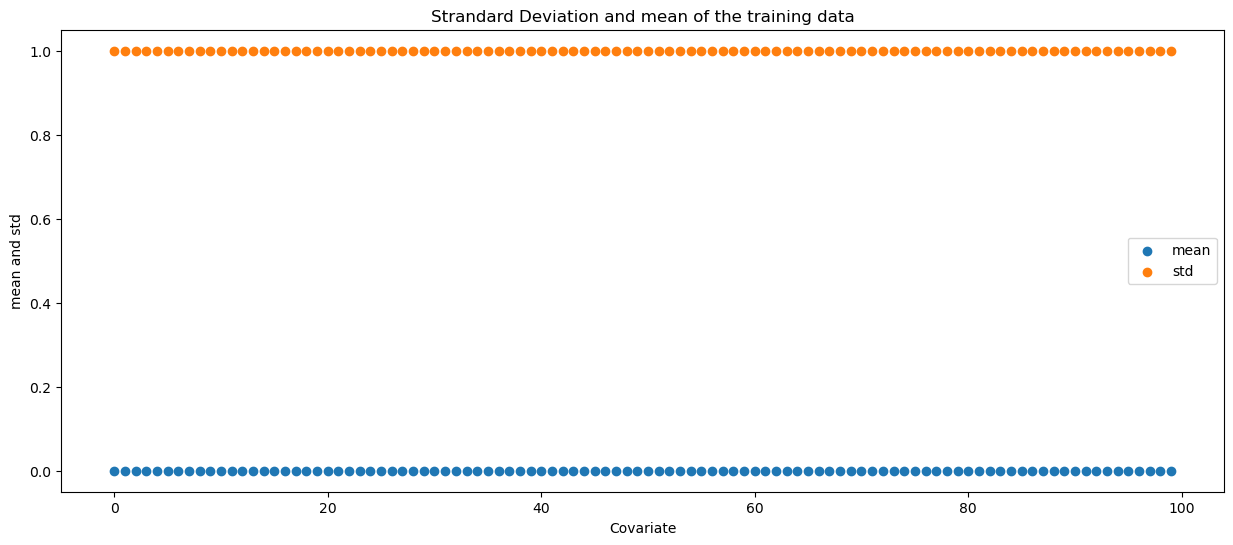

In [13]:
#c) 
#separate the data in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

#center and standardize both 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

#We verify by plotting the mean and the standard deviation for both data
#Plot Mean and standart deviation of the training data
plt.figure(figsize=(15,6))
plt.scatter(range(p), X_train.mean(axis=0), label="mean")
plt.scatter(range(p), X_train.std(axis=0), label="std")
plt.xlabel("Covariate")
plt.ylabel("mean and std")
plt.legend()
plt.title("Strandard Deviation and mean of the training data") 

plt.show()

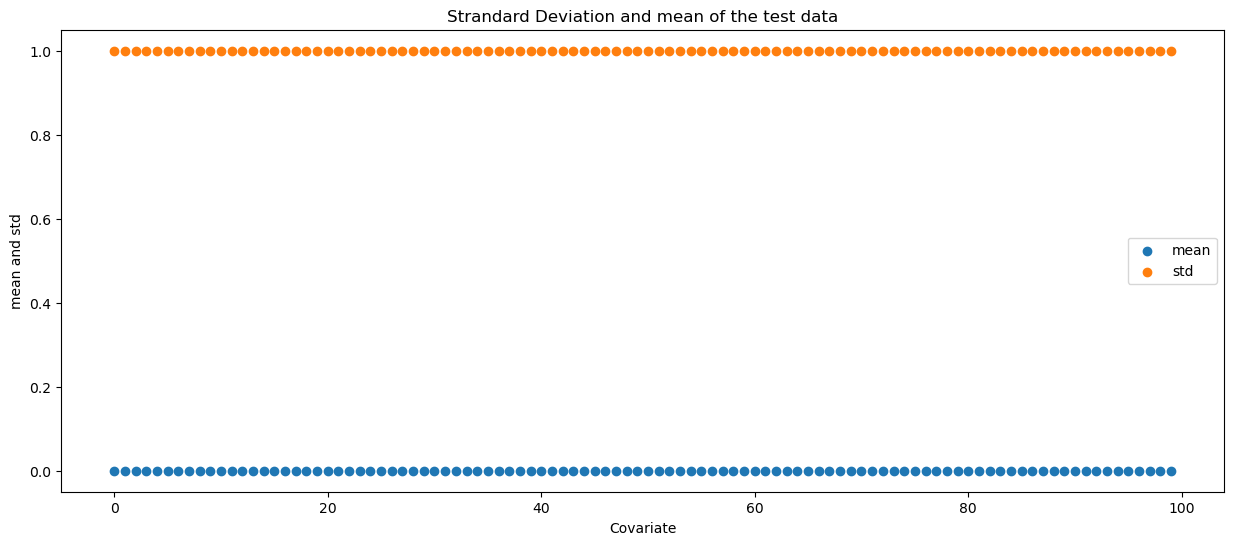

In [9]:
#Plot Mean and standart deviation of the test data
plt.figure(figsize=(15,6))
plt.scatter(range(p), X_test.mean(axis=0), label="mean")
plt.scatter(range(p), X_test.std(axis=0), label="std")
plt.xlabel("Covariate")
plt.ylabel("mean and std")
plt.legend()
plt.title("Strandard Deviation and mean of the test data") 
plt.show() 

The trainaing and the test data are standardized. 

In [16]:
#d)
model = LinearRegression().fit(X_train, Y_train)  # Fit a regular OLS 

Y_test isn't centered so it need to be intercept

In [55]:
#e)
df_coef = pd.DataFrame() 

X_bar = X.mean()
Y_bar = Y.mean()
Y_pred = model.predict(X_test)

#R² coefficient
RSS = np.sum((Y_test - Y_pred) ** 2) #Residual Sum of Square
TSS = np.sum((Y_test - Y_bar) ** 2)  #Total Sum Of Squares
Rsq = 1-RSS / TSS

df_coef['R2']=Rsq
print(f'coefficient of determination R2={Rsq:.4f}')


coefficient of determination R2=0.8680


## <u>Question 2)</u>

In [ ]:
def forward_variable_selection(Y, X):
    r=Y
    